## One sample testing

In one sample test, we compare the population parameter such as mean of a single sample of data collected from a single population. 


### Very rarely we know the variance of the population. 

A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean. 
A t test can be estimated for:
* 1) One sample t test
* 2) Two sample t test (including paired t test)

We assume that the samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.

# Example 1: T-test (sigma of the population is unknown)

Experian Marketing Services reported that the typical American spends a mean of 144 minutes (2.4 hours) per day accessing the Internet via a mobile device. (Source: The 2014 Digital Marketer, available at ex.pn/IkXJjfX.) In order to test the validity of this statement, you select a sample of 30 friends and family. The results for the time spent per day accessing the Internet via mobile device (in minutes) are stored in InternetMobileTime 

a. Is there evidence that the population mean time spent per day accessing the Internet via mobile device is different from 144 minutes? Use the p-value approach and a level of significance of 0.05. 

b. What assumption about the population distribution is needed in order to conduct the t test in (a)? 
Problem 9.35 from the Textbook adapted for Classroom Discussion(Chapter 9-page 314) 


In [25]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import   ttest_1samp
import seaborn as sns

In [4]:
mydata = pd.read_csv('InternetMobileTime+.csv')
mydata.head()

,Minutes
0,72
1,144
2,48
3,72
4,36


### Step 1: Define null and alternative hypotheses

In testing the average minutes spent on the internet.

#### Null hypothesis states that mean  internet usage time, $\mu$ is equals to 144.
#### Alternative hypothesis states that the mean mean  internet usage time, $\mu$ is unequal to 144.

* $H_0$: $\mu$ = 144
* $H_A$: $\mu$ $\neq$ 144

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05.

In [5]:
print("The sample size for this problem is",len(mydata))
mydata.count()

The sample size for this problem is 30


Minutes    30
dtype: int64

### Step 3: Identify the test statistic

We do not know the population standard deviation and n = 30. So we use the t distribution and the $t_{STAT}$ test statistic.

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value.**

In [9]:
# one sample t-test
# null hypothesis: expected value = 144
t_statistic, p_value = ttest_1samp(mydata, 40)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [5.2982181] p value: [1.10743971e-05] 


<AxesSubplot:>

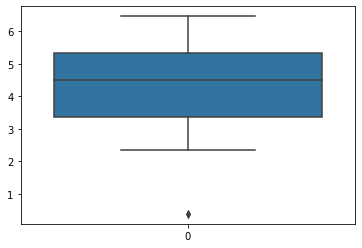

In [28]:
sample_data = {4.21, 5.55, 3.02, 5.13, 4.77, 2.34, 3.54, 3.20, 4.50, 6.10, 0.38, 5.12, 6.46, 6.19, 3.79}
sample_data
sample_df=pd.DataFrame(data=sample_data)
sample_df.mean()
sns.boxplot(data=sample_df)

In [22]:
t_statistic, p_value = ttest_1samp(sample_df, 4.286667)
p_value

array([0.99999938])

### Let us calculate at the value of the test statistic manually

Here, we see that the values of test statistic and the p-value is same as that we calculated from the function of the Scipy library.

### Step 5 Decide to reject or accept null hypothesis

In [5]:

# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= [0.23055327]


In this example, p value is 0.23055327 and it is greater than 5% level of significance

So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is  sufficient evidence  to prove that mean time spent on the internet is equal to  144 minutes. 